Variables Description

    1. Age (numeric)
    2. Sex (text: male, female)
    3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
    4. Housing (text: own, rent, or free)
    5. Saving accounts (text - little, moderate, quite rich, rich)
    6. Checking account (numeric, in DM - Deutsch Mark)
    7. Duration (numeric, in month)
    8. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
    9. Risk (good or bad. bad means default. Dependent Variable)
    10. Credit amount (numeric, in DM)
    11. Recovered Principle- Amount of Princeiple recovred from bad cases
    12. Recoveries- Total recoveries made from bad cases
    



# Binning of Variables

Topics Covered Here

    1. Loading the Libraries & Dataset
    2. Data Summary
    3. Data Visualization
    4. Missing Value Treatment
    5. Binning Categorical Variables
    6. Binning Continuous Variables




## 1. Loading the Libraries & Dataset

In [1]:
#import some necessary librairies

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

color = sns.color_palette()
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) #Limiting floats output to 3 decimal points
os.getcwd()

'C:\\Users\\sohai\\Desktop\\My Personal\\1. FinTech\\Stephanie\\Credit Risk'

<Figure size 864x576 with 0 Axes>

In [2]:
#Change the working directory
%cd "C:\Users\sohai\Desktop\My Personal\1. FinTech\Stephanie\Credit Risk"
print(os.listdir())

C:\Users\sohai\Desktop\My Personal\1. FinTech\Stephanie\Credit Risk
['.ipynb_checkpoints', '3.A- Binning of Variables.ipynb', '3.B- PD & Scorecard Model.ipynb', '3.C- Population Stability Index.ipynb', '4. LGD, EAD & EL Models.ipynb', 'German binned_data.xlsx', 'German Credit Data.xlsx', 'German Credit Final CRM.xlsx', 'lgd_model_stage_2.sav', 'pd_model.sav', 'reg_lgd.sav', 'scorecard values.xlsx', 'Test Set Score.csv']


In [3]:
#Now let's import and put the train and test datasets in  pandas dataframe

#df = pd.read_excel("German Credit Data.xlsx", sheet_name= 'input', date_parser=True)
#df.head(3)

In [4]:
df = 'https://raw.githubusercontent.com/TheJuniorLebowski/Data/master/German%20Credit%20Data.csv'


# Since it has both CRM training data and PSI data, we only need CRM training data.
df = pd.read_csv(df)
df = df[df['type']== 'CRM Data']
df = df.drop(['type'], axis=1)
df.head(4)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount,Recovered_Principle,Recoveries
0,67,male,2,own,NaN,little,6,radio/TV,good,17000,17000.00,0.00
1,22,female,2,own,little,moderate,48,radio/TV,bad,11000,9942.67,0.00
2,49,male,1,own,little,NaN,12,education,good,32200,32200.00,0.00
3,45,male,2,free,little,little,42,furniture/equipment,good,12000,12000.00,0.00


## 2. Data Summary

As we can see below, summary is shown only for numeric variables

In [5]:
# Summary of numerica variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,901.00,35.55,11.46,19.00,27.00,33.00,42.00,75.00
Job,901.00,1.90,0.65,0.00,2.00,2.00,2.00,3.00
Duration,901.00,20.72,12.01,4.00,12.00,18.00,24.00,72.00
Credit amount,901.00,14001.05,8391.89,1000.00,7200.00,12000.00,20000.00,35000.00
Recovered_Principle,901.00,9971.30,9698.99,0.00,708.24,8000.00,15450.00,35000.00
Recoveries,901.00,511.83,1162.37,0.00,0.00,0.00,0.00,5201.51


In [6]:
df.shape

(901, 12)

There are numeric as well categorical variables. We would have to convert the categorical variables into numeric using one hot encoding to train the model. We do this later on. Let's analyze the data 1st

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  901 non-null    int64  
 1   Sex                  901 non-null    object 
 2   Job                  901 non-null    int64  
 3   Housing              901 non-null    object 
 4   Saving accounts      738 non-null    object 
 5   Checking account     545 non-null    object 
 6   Duration             901 non-null    int64  
 7   Purpose              901 non-null    object 
 8   Risk                 901 non-null    object 
 9   Credit amount        901 non-null    int64  
 10  Recovered_Principle  901 non-null    float64
 11  Recoveries           901 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 91.5+ KB


In [8]:
df['Risk'].value_counts()

good    632
bad     269
Name: Risk, dtype: int64

## 3. Data Visualization

Correlation is defined as linear relationship between two random variables. It's fine an independent and dependent having significant. 

Correlation between independent variables (aka multi-collinearity) is problematic because it undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant. 

We can remove features with significant correlation. In this notebook, we remove the unnecessary and variables with high correlation in feature selection step

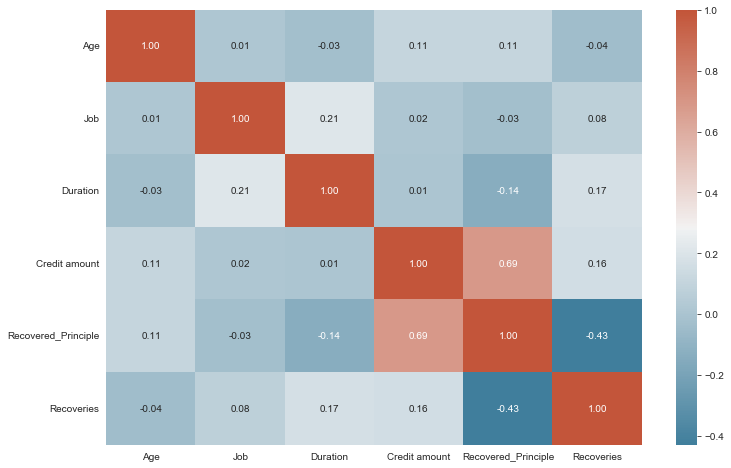

In [9]:
# Correlation matrix
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

In [10]:
# Correlation values
df.corr()

,Age,Job,Duration,Credit amount,Recovered_Principle,Recoveries
Age,1.00,0.01,-0.03,0.11,0.11,-0.04
Job,0.01,1.00,0.21,0.02,-0.03,0.08
Duration,-0.03,0.21,1.00,0.01,-0.14,0.17
Credit amount,0.11,0.02,0.01,1.00,0.69,0.16
Recovered_Principle,0.11,-0.03,-0.14,0.69,1.00,-0.43
Recoveries,-0.04,0.08,0.17,0.16,-0.43,1.00


## 4. Missing Value Treatment

    1. We replace the missing value of a numeric variable with its median values
    2. We replace the missing value of a categorical variable with its modal values

    

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

,Total Missing,Percent Missing
Checking account,356,0.40
Saving accounts,163,0.18
Recoveries,0,0.00
Recovered_Principle,0,0.00
Credit amount,0,0.00
Risk,0,0.00
Purpose,0,0.00
Duration,0,0.00
Housing,0,0.00
Job,0,0.00


In [12]:
# Delete any variable that has more than 20% of the data as missing. We already did this above
#df = df.dropna(thresh=0.8*len(df), axis=1)
#df.isnull().sum()

In [13]:
# Replace missing values with median in numeric variables
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
    

df.isnull().sum()

Age                      0
Sex                      0
Job                      0
Housing                  0
Saving accounts        163
Checking account       356
Duration                 0
Purpose                  0
Risk                     0
Credit amount            0
Recovered_Principle      0
Recoveries               0
dtype: int64

In [14]:
# Replace missing values with mode for categorical variables
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    

df.isnull().sum()

Age                    0
Sex                    0
Job                    0
Housing                0
Saving accounts        0
Checking account       0
Duration               0
Purpose                0
Risk                   0
Credit amount          0
Recovered_Principle    0
Recoveries             0
dtype: int64

In [15]:
df['Risk'].value_counts()

good    632
bad     269
Name: Risk, dtype: int64

## 5. Binning Categorical Variables

In [16]:
# Here we take bad case as 0 and good cases as 1
df['default'] = np.where(df['Risk'].isin(['good']),0,1)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount,Recovered_Principle,Recoveries,default
0,67,male,2,own,little,little,6,radio/TV,good,17000,17000.00,0.00,0
1,22,female,2,own,little,moderate,48,radio/TV,bad,11000,9942.67,0.00,1
2,49,male,1,own,little,little,12,education,good,32200,32200.00,0.00,0
3,45,male,2,free,little,little,42,furniture/equipment,good,12000,12000.00,0.00,0
4,53,male,2,free,little,little,24,car,bad,7000,167.56,0.00,1


In [17]:
df1 = df[['Housing', 'default']]
df1.head(3)

,Housing,default
0,own,0
1,own,1
2,own,0


In [18]:
df2 = pd.crosstab(df1['Housing'], df1['default'])
df2.columns = ['good', 'bad']
df2.reset_index(inplace=True)
df2

,Housing,good,bad
0,free,61,40
1,own,474,167
2,rent,97,62


In [19]:
df2['prop_good'] = df2['good'] / df2['good'].sum()
df2['prop_bad'] = df2['bad'] / df2['bad'].sum()
df2

,Housing,good,bad,prop_good,prop_bad
0,free,61,40,0.10,0.15
1,own,474,167,0.75,0.62
2,rent,97,62,0.15,0.23


In [20]:
df2['WoE'] = np.log(df2['prop_good'] / df2['prop_bad'])
df2

,Housing,good,bad,prop_good,prop_bad,WoE
0,free,61,40,0.10,0.15,-0.43
1,own,474,167,0.75,0.62,0.19
2,rent,97,62,0.15,0.23,-0.41


In [21]:
df2 = df2.sort_values(['WoE'])
df2

,Housing,good,bad,prop_good,prop_bad,WoE
0,free,61,40,0.10,0.15,-0.43
2,rent,97,62,0.15,0.23,-0.41
1,own,474,167,0.75,0.62,0.19


In [22]:
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df2['diff_prop_bad'] = df2['prop_bad'].diff().abs()
# We dont need diff_prop_good or diff_WOE. We calculated them just to see diff between two categories
df2['diff_WoE'] = df2['WoE'].diff().abs()
df2

,Housing,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE
0,free,61,40,0.10,0.15,-0.43,nan,nan
2,rent,97,62,0.15,0.23,-0.41,0.08,0.03
1,own,474,167,0.75,0.62,0.19,0.39,0.60


In [23]:
df2['IV'] = (df2['prop_good'] - df2['prop_bad']) * df2['WoE']
df2['IV_total'] = df2['IV'].sum()
# We sum all values of a given column.
df2

,Housing,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,free,61,40,0.10,0.15,-0.43,nan,nan,0.02,0.08
2,rent,97,62,0.15,0.23,-0.41,0.08,0.03,0.03,0.08
1,own,474,167,0.75,0.62,0.19,0.39,0.60,0.02,0.08


In [24]:


def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):

    df2 = pd.crosstab(df[discrete_variabe_name], good_bad_variable_df)
    df2.columns = ['good', 'bad']
    df2.reset_index(inplace=True)


    df2['prop_good'] = df2['good'] / df2['good'].sum()
    df2['prop_bad'] = df2['bad'] / df2['bad'].sum()

    df2['WoE'] = np.log(df2['prop_good'] / df2['prop_bad'])

    df2 = df2.sort_values(['WoE'])

    df2['diff_prop_bad'] = df2['prop_bad'].diff().abs()
    df2['diff_WoE'] = df2['WoE'].diff().abs()

    df2['IV'] = (df2['prop_good'] - df2['prop_bad']) * df2['WoE']
    df2['IV_total'] = df2['IV'].sum()
    return df2



In [25]:
df_housing = woe_discrete(df, 'Housing', df['default'])
df_housing

,Housing,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,free,61,40,0.10,0.15,-0.43,nan,nan,0.02,0.08
2,rent,97,62,0.15,0.23,-0.41,0.08,0.03,0.03,0.08
1,own,474,167,0.75,0.62,0.19,0.39,0.60,0.02,0.08


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.


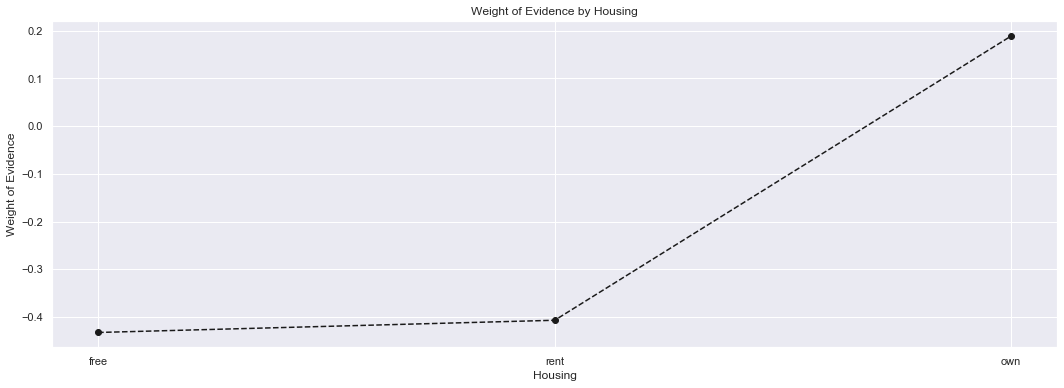

In [27]:
plot_by_woe(df_housing)

In [28]:
df_Job = woe_discrete(df, 'Job', df['default'])
df_Job

,Job,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
3,3,84,45,0.13,0.17,-0.23,nan,nan,0.01,0.01
0,0,14,6,0.02,0.02,-0.01,0.14,0.22,0.00,0.01
2,2,409,168,0.65,0.62,0.04,0.60,0.04,0.00,0.01
1,1,125,50,0.20,0.19,0.06,0.44,0.03,0.00,0.01


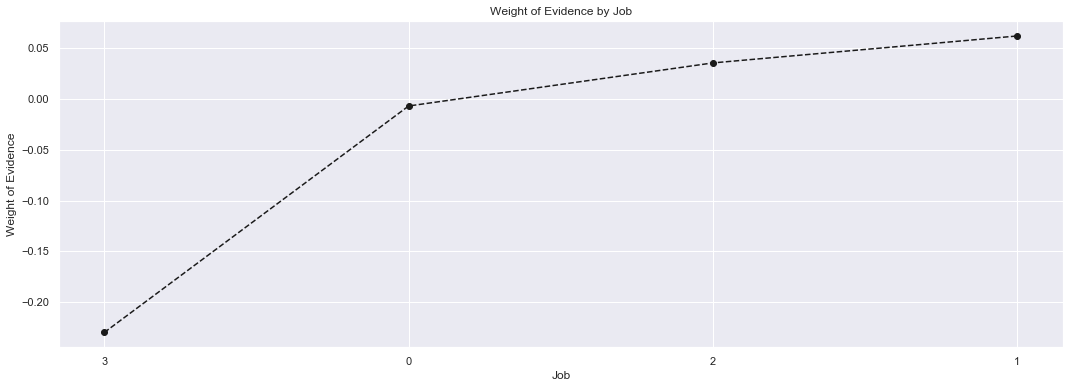

In [29]:
plot_by_woe(df_Job)

In [30]:
df_saving = woe_discrete(df, 'Saving accounts', df['default'])
df_saving

,Saving accounts,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
1,moderate,62,30,0.10,0.11,-0.13,nan,nan,0.00,0.11
0,little,482,226,0.76,0.84,-0.10,0.73,0.03,0.01,0.11
3,rich,40,6,0.06,0.02,1.04,0.82,1.14,0.04,0.11
2,quite rich,48,7,0.08,0.03,1.07,0.00,0.03,0.05,0.11


In [31]:
df_checking = woe_discrete(df, 'Checking account', df['default'])
df_checking

,Checking account,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
1,moderate,147,96,0.23,0.36,-0.43,nan,nan,0.05,0.08
0,little,440,160,0.70,0.59,0.16,0.24,0.59,0.02,0.08
2,rich,45,13,0.07,0.05,0.39,0.55,0.23,0.01,0.08


In [32]:
df_purpose = woe_discrete(df, 'Purpose', df['default'])
df_purpose

,Purpose,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
6,repairs,12,8,0.02,0.03,-0.45,nan,nan,0.00,0.07
3,education,34,22,0.05,0.08,-0.42,0.05,0.03,0.01,0.07
7,vacation/others,7,4,0.01,0.01,-0.29,0.07,0.12,0.00,0.07
0,business,59,30,0.09,0.11,-0.18,0.10,0.12,0.00,0.07
2,domestic appliances,8,4,0.01,0.01,-0.16,0.10,0.02,0.00,0.07
1,car,206,97,0.33,0.36,-0.10,0.35,0.06,0.00,0.07
4,furniture/equipment,113,50,0.18,0.19,-0.04,0.17,0.06,0.00,0.07
5,radio/TV,193,54,0.31,0.20,0.42,0.01,0.46,0.04,0.07


In [33]:
df_sex= woe_discrete(df, 'Sex', df['default'])
df_sex

,Sex,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,female,181,101,0.29,0.38,-0.27,nan,nan,0.02,0.04
1,male,451,168,0.71,0.62,0.13,0.25,0.40,0.01,0.04


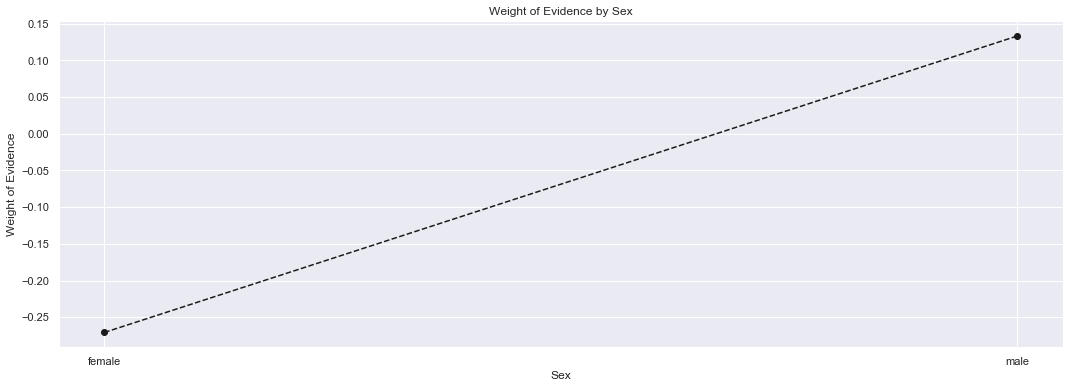

In [34]:
plot_by_woe(df_sex)

In [35]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Duration', 'Purpose', 'Risk', 'Credit amount', 'Recovered_Principle',
       'Recoveries', 'default'],
      dtype='object')

In [36]:
df_final = pd.get_dummies(df, columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
                                         'Purpose'])
df_final.head(3)


,Age,Duration,Risk,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,Job_0,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,6,good,17000,17000.00,0.00,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,48,bad,11000,9942.67,0.00,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,12,good,32200,32200.00,0.00,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## 6. Binning Continuous Variables

Here we define a function similar to the one above except two differences
   
   1. We cut the numeric variables in 40 bins beforehand (so that we have sufficient good bad in each bin to calculate WOE and IV)
   2. We dont sort the bins on the basis of WOE. Bins would be sorted on its value and WOE should automatically be monotonic.

In [37]:
def woe_continuous(df, numeric_variabe_name, good_bad_variable_df, bins = 40):
    
    df.loc[:, 'numeric_variabe_name1'] = pd.cut(df[numeric_variabe_name], bins)
    df2 = pd.crosstab(df['numeric_variabe_name1'], good_bad_variable_df)
    df2.columns = ['good', 'bad']
    df2.reset_index(inplace=True)
    df2.rename(columns = {'numeric_variabe_name1':numeric_variabe_name+"_bins"}, inplace=True)


    df2['prop_good'] = df2['good'] / df2['good'].sum()
    df2['prop_bad'] = df2['bad'] / df2['bad'].sum()

    df2['WoE'] = np.log(df2['prop_good'] / df2['prop_bad'])

    df2['diff_prop_bad'] = df2['prop_bad'].diff().abs()
    df2['diff_WoE'] = df2['WoE'].diff().abs()

    df2['IV'] = (df2['prop_good'] - df2['prop_bad']) * df2['WoE']
    df2['IV_total'] = df2['IV'].sum()
    df.drop(['numeric_variabe_name1'], axis=1)
    return df2


In [38]:
df_Age = woe_continuous(df, 'Age', df['default'], 50)
df_Age

,Age_bins,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,"(18.944, 20.12]",9,6,0.01,0.02,-0.45,nan,nan,0.00,inf
1,"(20.12, 21.24]",8,5,0.01,0.02,-0.38,0.00,0.06,0.00,inf
2,"(21.24, 22.36]",14,9,0.02,0.03,-0.41,0.01,0.03,0.00,inf
3,"(22.36, 23.48]",26,18,0.04,0.07,-0.49,0.03,0.07,0.01,inf
4,"(23.48, 24.6]",23,18,0.04,0.07,-0.61,0.00,0.12,0.02,inf
5,"(24.6, 25.72]",20,17,0.03,0.06,-0.69,0.00,0.08,0.02,inf
6,"(25.72, 26.84]",35,12,0.06,0.04,0.22,0.02,0.91,0.00,inf
7,"(26.84, 27.96]",36,13,0.06,0.05,0.16,0.00,0.05,0.00,inf
8,"(27.96, 29.08]",43,27,0.07,0.10,-0.39,0.05,0.55,0.01,inf
9,"(29.08, 30.2]",21,9,0.03,0.03,-0.01,0.07,0.38,0.00,inf


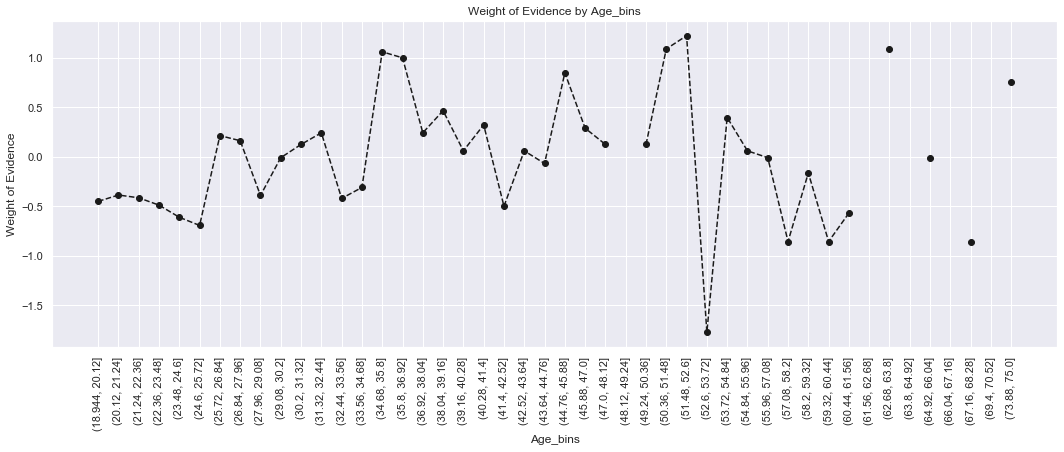

In [39]:
plot_by_woe(df_Age, 90)

In [40]:
df_final['Age:<25'] = np.where((df_final['Age'] < 25), 1, 0)
df_final['Age:25-35'] = np.where((df_final['Age']>=25) & (df_final['Age'] < 35), 1, 0)
df_final['Age:35-45'] = np.where((df_final['Age']>=35) & (df_final['Age'] < 45), 1, 0)
df_final['Age:45-50'] = np.where((df_final['Age']>=45) & (df_final['Age'] < 50), 1, 0)

df_final['Age:>= 50'] = np.where((df_final['Age'] >= 50), 1, 0)

df_final.tail(5)

,Age,Duration,Risk,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,Job_0,...,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age:<25,Age:25-35,Age:35-45,Age:45-50,Age:>= 50
896,28,21,good,28000,28000.00,0.00,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
897,35,12,good,20000,20000.00,0.00,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
898,33,15,good,12250,12250.00,0.00,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
899,42,18,bad,12600,25.00,0.00,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
900,43,16,bad,9000,444.37,0.00,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Unique values and their counts for duration
print(len(df_final['Duration'].unique()))
print(df_final['Duration'].value_counts())



33
12    166
24    162
18    107
36     76
6      70
15     55
9      43
48     43
30     32
21     27
10     26
27     12
60     11
42      9
8       7
20      7
11      7
4       5
39      5
7       5
14      4
33      3
45      3
13      3
22      2
16      2
28      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Duration, dtype: int64


In [42]:
df_duration = woe_continuous(df, 'Duration', df['default'], 20)
df_duration

,Duration_bins,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,"(3.932, 7.4]",73,8,0.12,0.03,1.36,nan,nan,0.12,inf
1,"(7.4, 10.8]",61,15,0.10,0.06,0.55,0.03,0.81,0.02,inf
2,"(10.8, 14.2]",131,49,0.21,0.18,0.13,0.13,0.42,0.00,inf
3,"(14.2, 17.6]",45,12,0.07,0.04,0.47,0.14,0.34,0.01,inf
4,"(17.6, 21.0]",90,51,0.14,0.19,-0.29,0.14,0.75,0.01,inf
5,"(21.0, 24.4]",119,45,0.19,0.17,0.12,0.02,0.40,0.00,inf
6,"(24.4, 27.8]",9,4,0.01,0.01,-0.04,0.15,0.16,0.00,inf
7,"(27.8, 31.2]",23,11,0.04,0.04,-0.12,0.03,0.07,0.00,inf
8,"(31.2, 34.6]",2,1,0.00,0.00,-0.16,0.04,0.04,0.00,inf
9,"(34.6, 38.0]",42,34,0.07,0.13,-0.64,0.12,0.48,0.04,inf


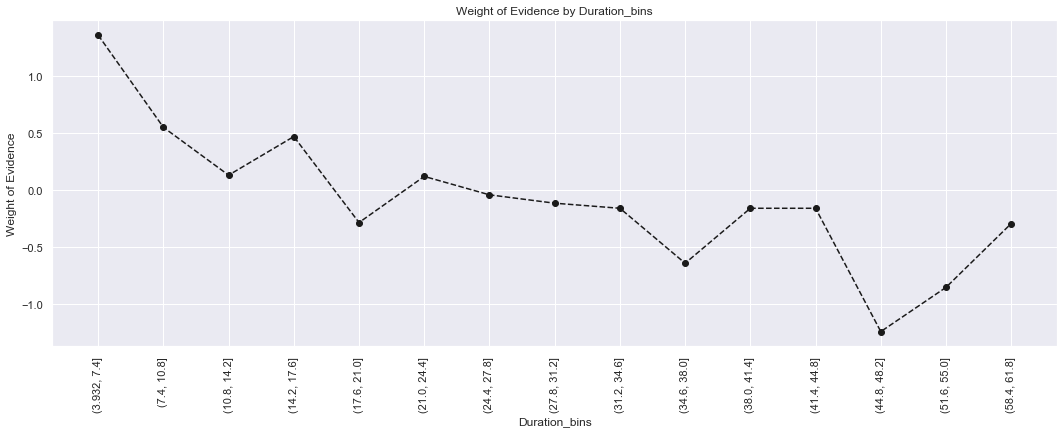

In [43]:
plot_by_woe(df_duration, 90)

In [44]:
df_final['Duration:<7'] = np.where((df_final['Duration'] < 7), 1, 0)
df_final['Duration:7-14'] = np.where((df_final['Duration']>=7) & (df_final['Duration'] < 14), 1, 0)
df_final['Duration:14-21'] = np.where((df_final['Duration']>=14) & (df_final['Duration'] < 21), 1, 0)
df_final['Duration:21-36'] = np.where((df_final['Duration']>=21) & (df_final['Duration'] < 36), 1, 0)

df_final['Duration:>= 36'] = np.where((df_final['Duration'] >= 36), 1, 0)

df_final.tail(5)


,Age,Duration,Risk,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,Job_0,...,Age:<25,Age:25-35,Age:35-45,Age:45-50,Age:>= 50,Duration:<7,Duration:7-14,Duration:14-21,Duration:21-36,Duration:>= 36
896,28,21,good,28000,28000.00,0.00,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
897,35,12,good,20000,20000.00,0.00,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
898,33,15,good,12250,12250.00,0.00,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
899,42,18,bad,12600,25.00,0.00,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
900,43,16,bad,9000,444.37,0.00,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [45]:
df_amt = woe_continuous(df, 'Credit amount', df['default'], 50)
df_amt

,Credit amount_bins,good,bad,prop_good,prop_bad,WoE,diff_prop_bad,diff_WoE,IV,IV_total
0,"(966.0, 1680.0]",7,0,0.01,0.00,inf,nan,nan,inf,inf
1,"(1680.0, 2360.0]",9,1,0.01,0.00,1.34,0.00,inf,0.01,inf
2,"(2360.0, 3040.0]",22,7,0.03,0.03,0.29,0.02,1.05,0.00,inf
3,"(3040.0, 3720.0]",7,6,0.01,0.02,-0.70,0.00,0.99,0.01,inf
4,"(3720.0, 4400.0]",20,5,0.03,0.02,0.53,0.00,1.23,0.01,inf
5,"(4400.0, 5080.0]",32,10,0.05,0.04,0.31,0.02,0.22,0.00,inf
6,"(5080.0, 5760.0]",16,1,0.03,0.00,1.92,0.03,1.61,0.04,inf
7,"(5760.0, 6440.0]",32,17,0.05,0.06,-0.22,0.06,2.14,0.00,inf
8,"(6440.0, 7120.0]",18,12,0.03,0.04,-0.45,0.02,0.23,0.01,inf
9,"(7120.0, 7800.0]",15,4,0.02,0.01,0.47,0.03,0.92,0.00,inf


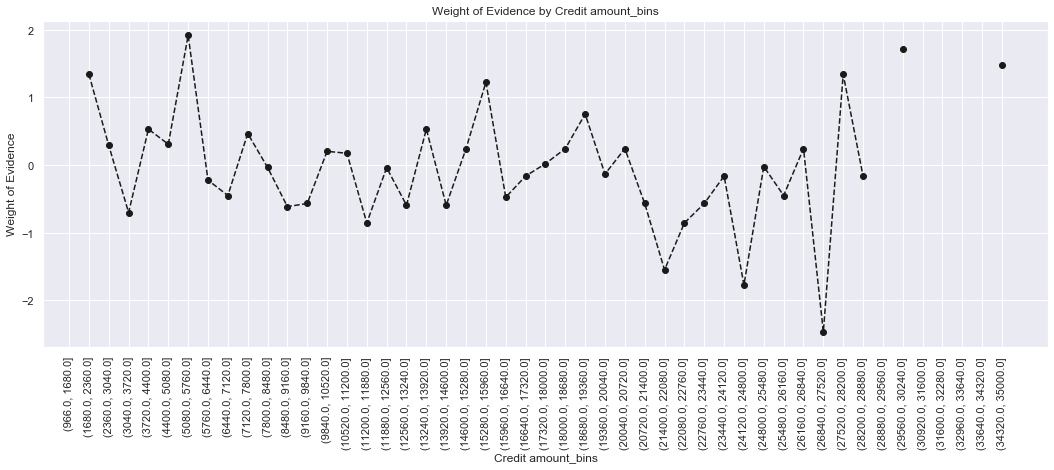

In [46]:
plot_by_woe(df_amt, 90)


In [47]:
df_final['Loan:<3500'] = np.where((df_final['Credit amount'] < 3500), 1, 0)
df_final['Loan:3.5k-8k'] = np.where((df_final['Credit amount']>=3500) & (df_final['Credit amount'] < 8000), 1, 0)
df_final['Loan:8k-12k'] = np.where((df_final['Credit amount']>=3000) & (df_final['Credit amount'] < 12000), 1, 0)
df_final['Loan:12k-20k'] = np.where((df_final['Credit amount']>=4500) & (df_final['Credit amount'] < 20000), 1, 0)
df_final['Loan:20-26k'] = np.where((df_final['Credit amount']>=7000) & (df_final['Credit amount'] < 26000), 1, 0)


df_final['Loan:>= 26k'] = np.where((df_final['Credit amount'] >= 26000), 1, 0)

df_final.tail(5)


,Age,Duration,Risk,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,Job_0,...,Duration:7-14,Duration:14-21,Duration:21-36,Duration:>= 36,Loan:<3500,Loan:3.5k-8k,Loan:8k-12k,Loan:12k-20k,Loan:20-26k,Loan:>= 26k
896,28,21,good,28000,28000.00,0.00,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
897,35,12,good,20000,20000.00,0.00,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
898,33,15,good,12250,12250.00,0.00,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
899,42,18,bad,12600,25.00,0.00,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
900,43,16,bad,9000,444.37,0.00,1,0,1,0,...,0,1,0,0,0,0,1,1,1,0


In [48]:
df_final.to_excel('German binned_data.xlsx', sheet_name="Sheet1")

In [49]:
# Make sure all columns have non-NaN correlations
df_final.corr()

,Age,Duration,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,Job_0,Job_1,...,Duration:7-14,Duration:14-21,Duration:21-36,Duration:>= 36,Loan:<3500,Loan:3.5k-8k,Loan:8k-12k,Loan:12k-20k,Loan:20-26k,Loan:>= 26k
Age,1.00,-0.03,0.11,0.11,-0.04,-0.09,-0.17,0.17,0.07,0.04,...,0.05,-0.06,-0.03,0.00,-0.00,-0.09,-0.11,-0.03,0.03,0.04
Duration,-0.03,1.00,0.01,-0.14,0.17,0.20,-0.08,0.08,-0.05,-0.18,...,-0.51,-0.15,0.20,0.81,0.06,-0.02,-0.03,-0.04,-0.04,0.04
Credit amount,0.11,0.01,1.00,0.69,0.16,-0.02,-0.04,0.04,-0.00,0.01,...,0.01,-0.05,-0.02,0.04,-0.32,-0.53,-0.70,-0.51,0.12,0.67
Recovered_Principle,0.11,-0.14,0.69,1.00,-0.43,-0.64,-0.06,0.06,0.00,0.02,...,0.06,-0.03,0.00,-0.11,-0.20,-0.32,-0.45,-0.33,-0.03,0.57
Recoveries,-0.04,0.17,0.16,-0.43,1.00,0.68,0.05,-0.05,-0.02,-0.03,...,-0.06,-0.03,0.01,0.15,-0.08,-0.11,-0.17,-0.13,0.14,-0.01
default,-0.09,0.20,-0.02,-0.64,0.68,1.00,0.09,-0.09,0.00,-0.01,...,-0.07,0.02,-0.01,0.18,-0.05,-0.02,0.01,0.03,0.13,-0.10
Sex_female,-0.17,-0.08,-0.04,-0.06,0.05,0.09,1.00,-1.00,0.08,0.02,...,0.02,0.05,-0.00,-0.09,-0.05,0.03,0.02,0.04,0.02,-0.06
Sex_male,0.17,0.08,0.04,0.06,-0.05,-0.09,-1.00,1.00,-0.08,-0.02,...,-0.02,-0.05,0.00,0.09,0.05,-0.03,-0.02,-0.04,-0.02,0.06
Job_0,0.07,-0.05,-0.00,0.00,-0.02,0.00,0.08,-0.08,1.00,-0.07,...,-0.01,0.04,-0.07,-0.01,0.03,-0.01,-0.04,0.02,-0.01,0.00
Job_1,0.04,-0.18,0.01,0.02,-0.03,-0.01,0.02,-0.02,-0.07,1.00,...,0.17,-0.06,-0.07,-0.12,-0.03,0.03,0.01,-0.00,0.00,-0.02
